<a href="https://colab.research.google.com/github/KendallScott/QTW/blob/main/Case%20Study%205/Case_Study_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 96.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import StandardScaler
from numpy import arange
from sklearn.model_selection import GridSearchCV

#from example SVM notebook
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Prediction on the Action column, for use with a firewall.

Port is like an address that allows connection like a tv channel.


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/KendallScott/QTW/main/Case%20Study%205/log2.csv")
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [7]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


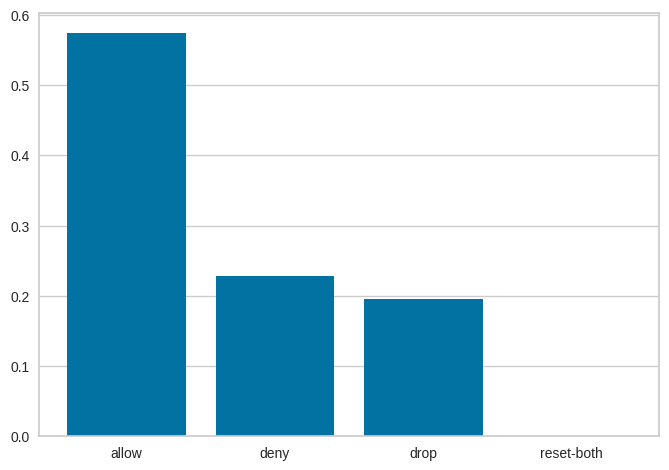

In [8]:
plt.bar(df['Action'].value_counts(normalize=True).index,df['Action'].value_counts(normalize=True))
plt.grid(axis='x')
plt.show()

In [9]:
df['Source Port'] = df['Source Port'].astype(str)
df['Destination Port'] = df['Destination Port'].astype(str)
df['NAT Source Port'] = df['NAT Source Port'].astype(str)
df['NAT Destination Port'] = df['NAT Destination Port'].astype(str)

In [10]:
df.describe()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [11]:
value_counts = df['Source Port'].value_counts()
value_counts

58638    840
27005    513
443      273
57470    222
49418    210
        ... 
32996      1
60574      1
60570      1
65368      1
54871      1
Name: Source Port, Length: 22724, dtype: int64

In [12]:
sp_agg = df.groupby(['Source Port']).size().reset_index(name='counts')
sp_agg

,Source Port,counts
0,0,173
1,10000,3
2,10001,2
3,10002,2
4,10003,8
...,...,...
22719,993,19
22720,9957,3
22721,9968,1
22722,9969,1


In [13]:
sp_counts = sp_agg.groupby(['counts']).size().reset_index(name='Number_of_counts')
sp_counts

,counts,Number_of_counts
0,1,9102
1,2,4456
2,3,3481
3,4,1932
4,5,1282
5,6,916
6,7,581
7,8,337
8,9,234
9,10,144


Text(0, 0.5, 'Counts')

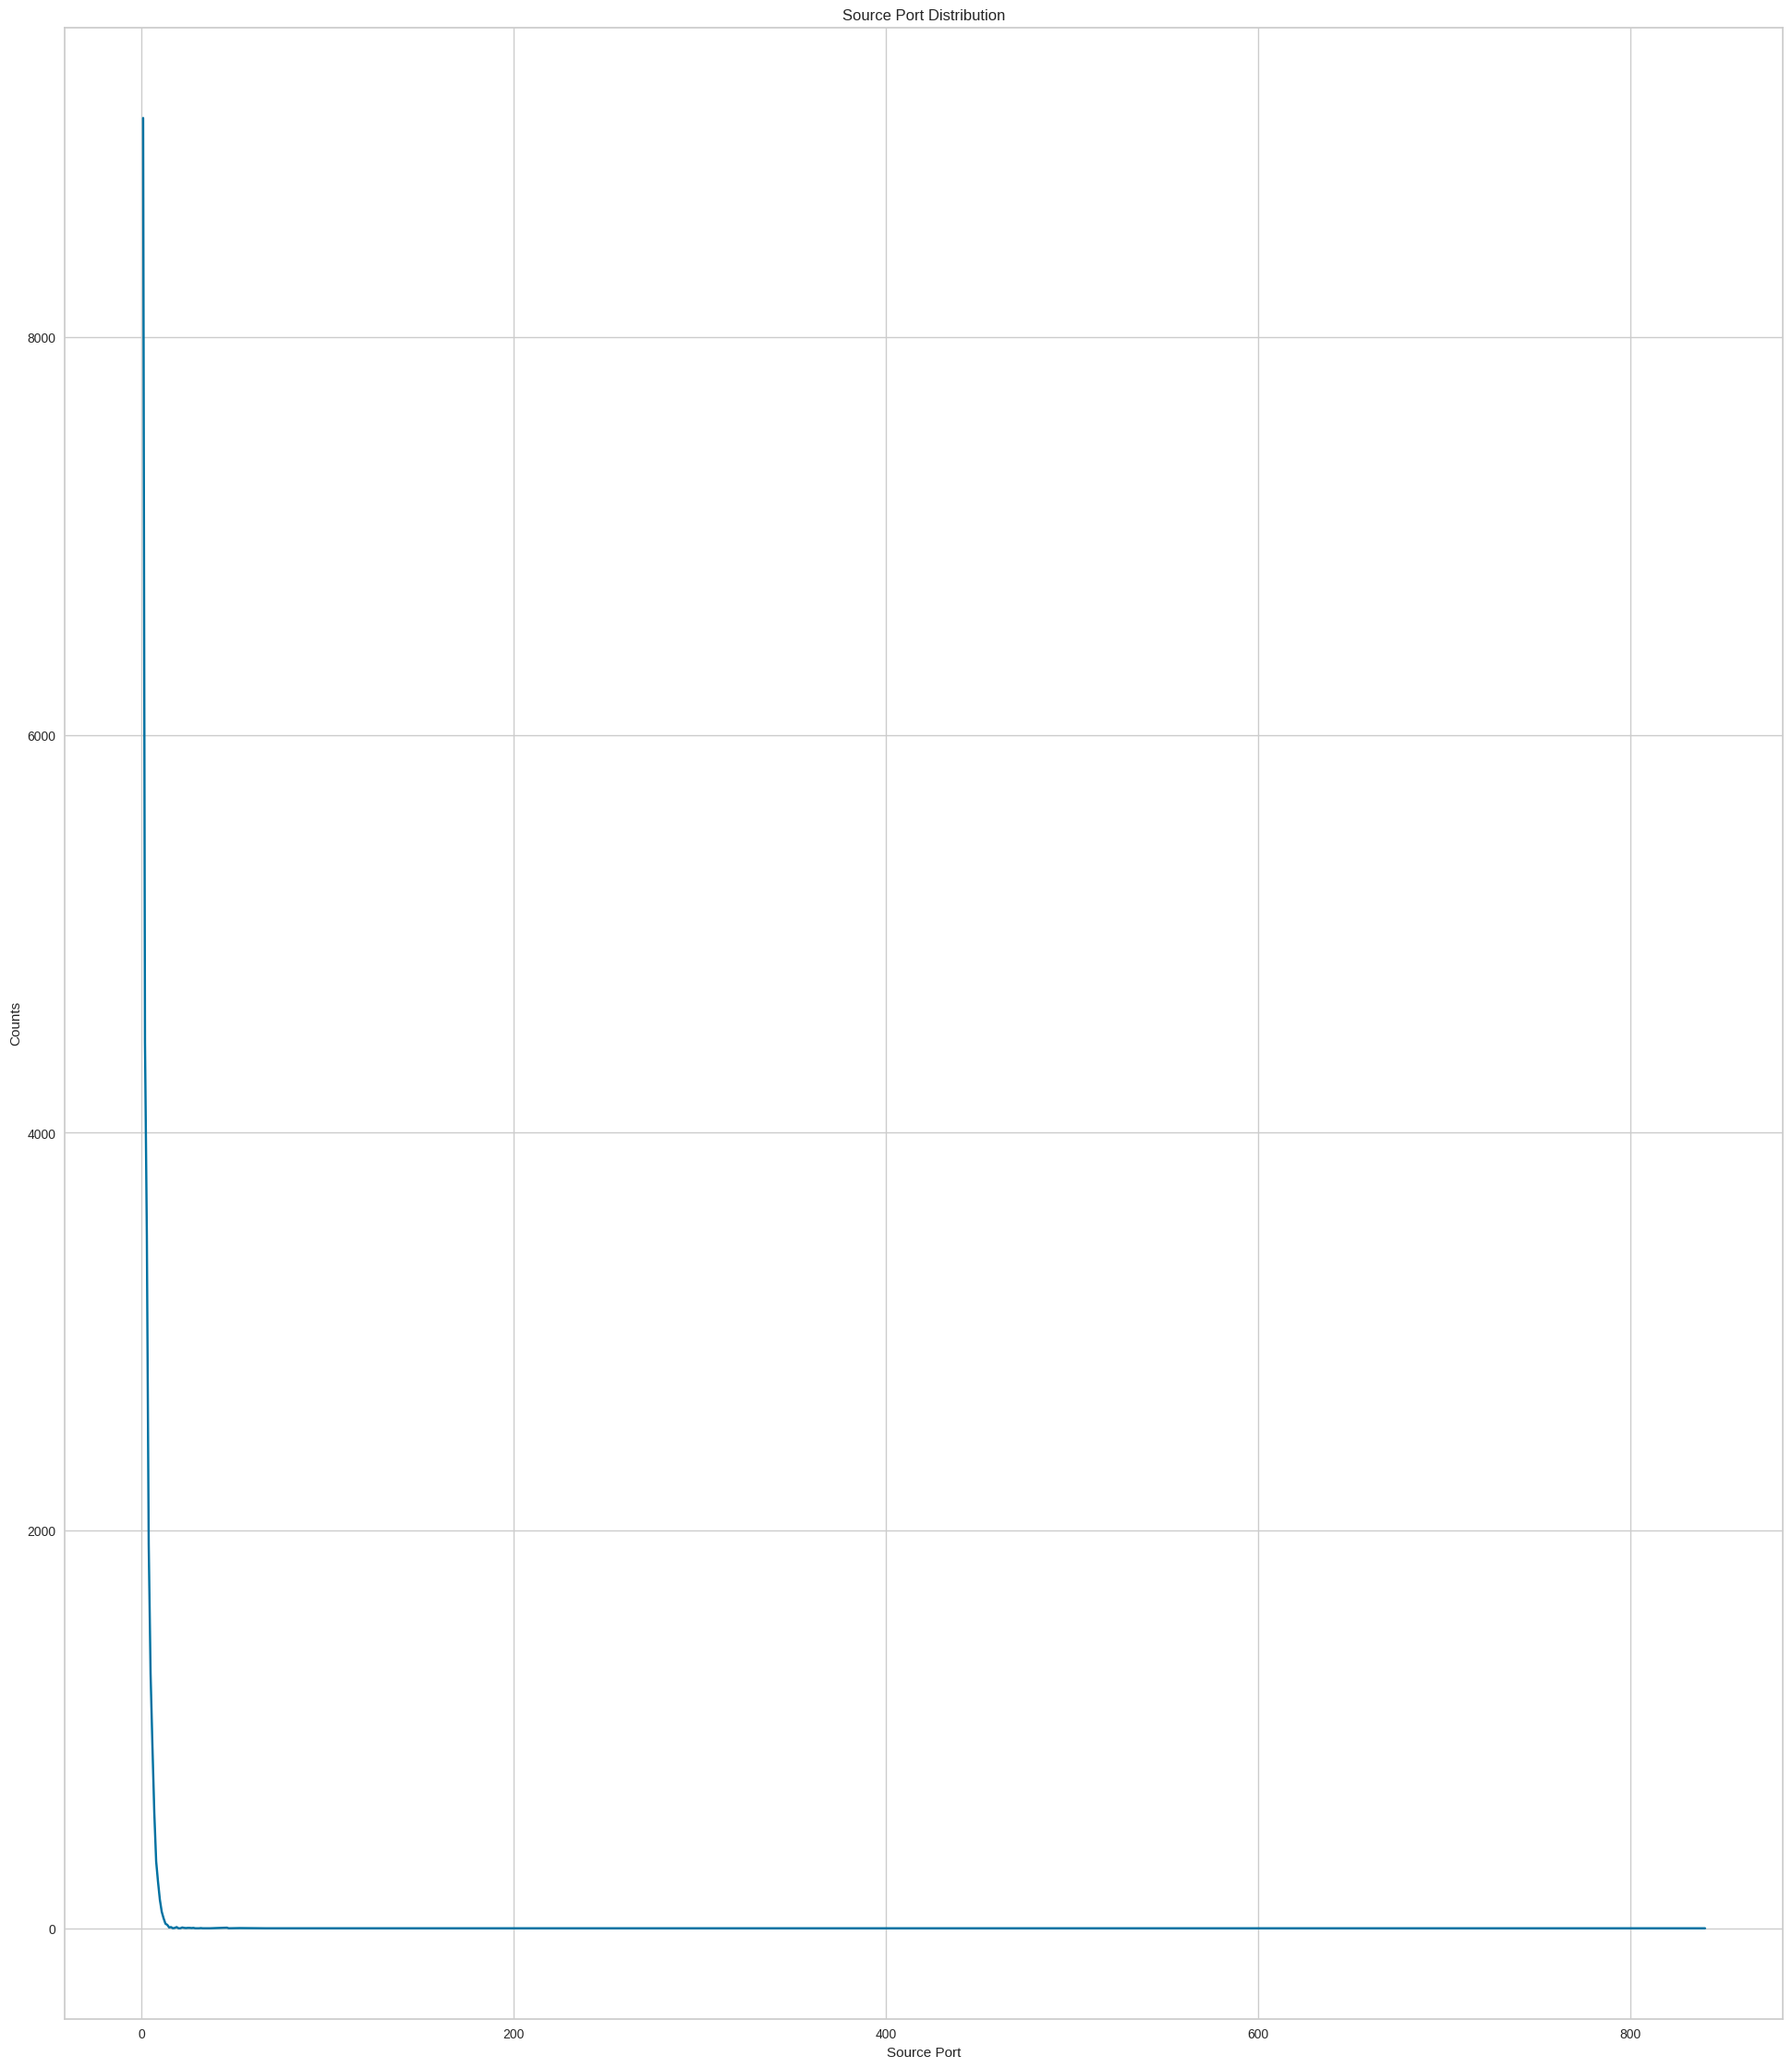

In [ ]:
fig, ax = plt.subplots(figsize=(24,28))

# Generate sequential data and plot
x = sp_counts['counts']
y = sp_counts['Number_of_counts']
ax.plot(x, y)

# Add title and axis names
ax.set_title('Source Port Distribution')
ax.set_xlabel('Source Port')
ax.set_ylabel('Counts')

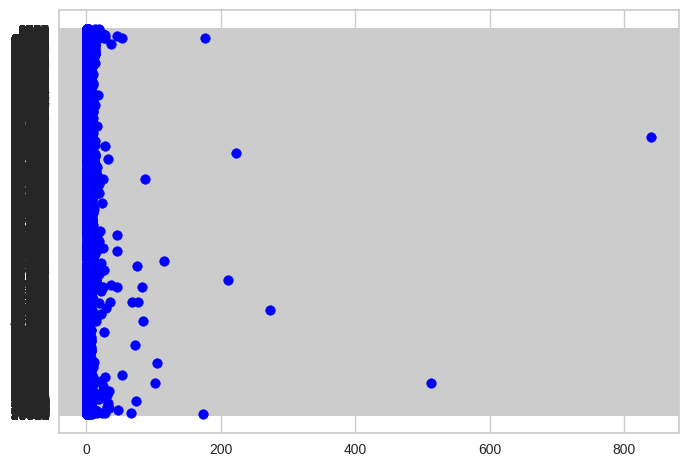

In [ ]:
plt.scatter(sp_agg['counts'], y=sp_agg['Source Port'], c ="blue")

In [14]:
dp_agg = df.groupby(['Destination Port']).size().reset_index(name='counts')
dp_agg

,Destination Port,counts
0,0,173
1,1,85
2,10004,2
3,10010,9
4,10012,2
...,...,...
3268,993,40
3269,995,10
3270,9986,7
3271,9992,1


In [15]:
value_counts = df['Source Port'].value_counts()

#creating list of columns with fewer than 32 values to remove before turning into categorical column (equals .05% of the rows in this dataset)
droplist = pd.DataFrame(value_counts)
droplist = droplist[droplist['Source Port']< 32]
droplist = list(droplist.index.values)

value_counts_DP = df['Destination Port'].value_counts()

#creating list of columns with fewer than 32 values to remove before turning into categorical column (equals .05% of the rows in this dataset)
droplist_DP = pd.DataFrame(value_counts_DP)
droplist_DP = droplist_DP[droplist_DP['Destination Port']< 32]
droplist_DP = list(droplist_DP.index.values)

value_counts_NAT = df['NAT Source Port'].value_counts()
droplist_NAT = pd.DataFrame(value_counts_NAT)
droplist_NAT = droplist_NAT[droplist_NAT['NAT Source Port']< 32]
droplist_NAT = list(droplist_NAT.index.values)

value_counts_NAT_DP = df['NAT Destination Port'].value_counts()
droplist_NAT_DP = pd.DataFrame(value_counts_NAT_DP)
droplist_NAT_DP = droplist_NAT_DP[droplist_NAT_DP['NAT Destination Port']<32]
droplist_NAT_DP = list(droplist_NAT_DP.index.values)

In [16]:
len(droplist)

22691

In [17]:
len(droplist_DP)

3196

In [18]:
len(droplist_NAT)

29149

In [19]:
len(droplist_NAT_DP)

2510

There are 22,724 distinct Source Ports in this dataset.

In [20]:
#i=0

#Replacing low frequency Source Ports (under .05%), with "low-frequency" value, to limit the size of the dataframe

#while i < len(droplist):
#  df['Source Port']=df['Source Port'].replace((droplist[i]),"low-frequency")
#  print(droplist[i])
#  i+=1

# runs a bit faster
sp_list = []
for i in df.index:
    if df['Source Port'][i] in droplist:
        sp_list.append('low-frequency')
    else:
        sp_list.append(df['Source Port'][i])
df['Source Port']=sp_list

In [21]:
#i=0

#Replacing low frequency Source Ports (under .05%), with "Dropped" value, to limit the size of the dataframe

#while i < len(droplist_DP):
#  df['Destination Port']=df['Destination Port'].replace((droplist_DP[i]),"low-frequency")
#  print(droplist_DP[i])
#  i+=1

# runs a bit faster
dp_list = []
for i in df.index:
    if df['Destination Port'][i] in droplist_DP:
        dp_list.append('low-frequency')
    else:
        dp_list.append(df['Destination Port'][i])
df['Destination Port'] = dp_list

In [22]:
nat_list = []
for i in df.index:
    if df['NAT Source Port'][i] in droplist_NAT:
        nat_list.append('low-frequency')
    else:
        nat_list.append(df['NAT Source Port'][i])
df['NAT Source Port'] = nat_list

In [23]:
nat_dp_list = []
for i in df.index:
    if df['NAT Destination Port'][i] in droplist_NAT_DP:
        nat_dp_list.append('low-frequency')
    else:
        nat_dp_list.append(df['NAT Destination Port'][i])
df['NAT Destination Port'] = nat_dp_list

In [24]:
# Make dataframe for model input
X = df.loc[:, df.columns != 'Action']

#one hot encoding categorical variables for model
cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list((set(cols) - set(num_cols)))

#creating dataframe of categorical columns
cat_df = X[cat_cols]
cat_df = pd.get_dummies(cat_df, columns=cat_df.columns)

#creating dataframe of numeric columns
scaler = StandardScaler()
num_df = scaler.fit_transform(X[num_cols])

X=cat_df.join(pd.DataFrame(num_df,columns=X[num_cols].columns, index=X[num_cols].index))
X

,NAT Source Port_0,NAT Source Port_48817,NAT Source Port_58638,NAT Source Port_low-frequency,Destination Port_0,Destination Port_1,Destination Port_11392,Destination Port_123,Destination Port_1433,Destination Port_15000,...,Source Port_6881,Source Port_80,Source Port_low-frequency,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.017231,-0.005798,-0.030293,-0.018871,-0.168067,-0.011619,-0.026747
65528,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.815823,0.011736,1.842607,0.890740,0.036919,0.293149,1.632037
65529,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646
65530,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646


Updates for Source & Destination Port, changed column number from 57,689 down to 31,805 by replacing values which represented less than 99.95% of the data overall (to help make the model more efficient, since that is a requirement for this model to be leveraged).

In [25]:
X.describe()

,NAT Source Port_0,NAT Source Port_48817,NAT Source Port_58638,NAT Source Port_low-frequency,Destination Port_0,Destination Port_1,Destination Port_11392,Destination Port_123,Destination Port_1433,Destination Port_15000,...,Source Port_6881,Source Port_80,Source Port_low-frequency,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,...,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04
mean,0.433864,0.001267,0.000778,0.564091,0.002640,0.001297,0.002808,0.002579,0.001007,0.001282,...,0.002701,0.000702,0.939083,2.168537e-18,-3.252805e-19,0.000000,-8.674147e-19,2.298649e-17,2.168537e-19,8.674147e-19
std,0.495611,0.035566,0.027886,0.495879,0.051313,0.035992,0.052915,0.050718,0.031720,0.035780,...,0.051901,0.026485,0.239179,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.727610e-02,-5.832069e-03,-0.030342,-1.984546e-02,-2.176608e-01,-1.255093e-02,-2.764633e-02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.727503e-02,-5.830501e-03,-0.030342,-1.984546e-02,-2.176608e-01,-1.255093e-02,-2.764633e-02
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.725687e-02,-5.824232e-03,-0.030310,-1.965064e-02,-1.680674e-01,-1.255093e-02,-2.719655e-02
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.715288e-02,-5.792885e-03,-0.030160,-1.887137e-02,-1.184740e-01,-1.192959e-02,-2.674677e-02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.259118e+02,2.477606e+02,130.240541,2.018353e+02,3.556895e+01,2.322194e+02,1.471436e+02


In [26]:
#creating dataframe to find where there is high readmitted rates for a variable
y_alt = df[['Action']].values.flatten()
#y_alt = pd.get_dummies(y_alt, columns=y_alt.columns)

In [27]:
y_alt

array(['allow', 'allow', 'allow', ..., 'drop', 'drop', 'drop'],
      dtype=object)

In [28]:
#linear svc
model = LinearSVC(max_iter=100000,tol=0.01,random_state=709)
X_train,X_test, y_train,y_test = train_test_split(X,y_alt)
C_list = [.001,.005,.01,.05,.1,.2,.5,.8,1,3,5,10,20,50,100,500,1000,5000,10000,100000]

In [ ]:
train_lsvc = pd.DataFrame()
for C in C_list:
    model.C = C
    model.fit(X_train,y_train)
    p=model.predict(X_test)
    df_search = pd.DataFrame({'accuracy':[accuracy_score(y_test,p)]},index=[C])
    train_lsvc = pd.concat([train_lsvc,df_search])
train_lsvc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5999511688945859 1e-06


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9949337728132821 4.281332398719396e-06


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.990661051089544 1.8329807108324375e-05


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.990661051089544 7.847599703514606e-05


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.990661051089544 0.0003359818286283781


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.990661051089544 0.0014384498882876629


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9960935115668681 0.00615848211066026


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9963987059757066 0.026366508987303555


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9967039003845449 0.11288378916846883


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9966428615027773 0.4832930238571752


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9970701336751511 2.06913808111479


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9971311725569187 8.858667904100814


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9971311725569187 37.92690190732246


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9971311725569187 162.37767391887175


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9982298724287371 695.1927961775591


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# kernel linear
model_svc_l = SVC(max_iter=100000,tol=0.01,random_state=709,class_weight='balanced',kernel='linear')
train_svc_l = pd.DataFrame()
for C in C_list:
    model_svc_l.C = C
    model_svc_l.fit(X_train,y_train)
    p=model_svc_l.predict(X_test)
    df_search = pd.DataFrame({'accuracy':[accuracy_score(y_test,p)]}, index=[C])
    train_svc_l = pd.concat([train_svc_l,df_search])
train_svc_l

In [ ]:
#kernel rbf
model_svc_r = SVC(max_iter=100000,tol=0.01,random_state=709,class_weight='balanced',kernel='rbf')
train_svc_r = pd.DataFrame()
for C in C_list:
    model_svc_r.C = C
    model_svc_r.fit(X_train,y_train)
    p=model_svc_r.predict(X_test)
    df_search = pd.DataFrame({'accuracy':[accuracy_score(y_test,p)]}, index=[C])
    train_svc_r = pd.concat([train_svc_r,df_search])
train_svc_r

In [ ]:
#kernel sigmoid
model_svc_s = SVC(max_iter=100000,tol=0.01,random_state=709,class_weight='balanced',kernel='sigmoid')
train_svc_s = pd.DataFrame()
for C in C_list:
    model_svc_s.C = C
    model_svc_s.fit(X_train,y_train)
    p=model_svc_s.predict(X_test)
    df_search = pd.DataFrame({'accuracy':[accuracy_score(y_test,p)]}, index=[C])
    train_svc_s = pd.concat([train_svc_s,df_search])
train_svc_s

In [ ]:
train_lsvc.sort_values(by='accuracy',ascending=False).head(3)

In [ ]:
train_svc_l.sort_values(by='accuracy',ascending=False).head(3)

In [ ]:
train_svc_r.sort_values(by='accuracy',ascending=False).head(3)

In [ ]:
train_svc_s.sort_values(by='accuracy',ascending=False).head(3)

In [ ]:
model.C = 0.005
model.fit(X_train,y_train)
p=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      9429
        deny       0.98      0.99      0.99      3654
        drop       1.00      1.00      1.00      3284
  reset-both       0.00      0.00      0.00        16

    accuracy                           0.99     16383
   macro avg       0.74      0.75      0.75     16383
weighted avg       0.99      0.99      0.99     16383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X.columns

Index(['NAT Source Port_0', 'NAT Source Port_10000', 'NAT Source Port_10001',
       'NAT Source Port_10002', 'NAT Source Port_10005',
       'NAT Source Port_10007', 'NAT Source Port_10010',
       'NAT Source Port_10011', 'NAT Source Port_10013',
       'NAT Source Port_10014',
       ...
       'Source Port_6881', 'Source Port_80', 'Source Port_low-frequency',
       'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets',
       'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object', length=31804)

In [ ]:
scores = np.dot(X, model.coef_.T)

In [ ]:
X.columns

Index(['NAT Source Port_0', 'NAT Source Port_10000', 'NAT Source Port_10001',
       'NAT Source Port_10002', 'NAT Source Port_10005',
       'NAT Source Port_10007', 'NAT Source Port_10010',
       'NAT Source Port_10011', 'NAT Source Port_10013',
       'NAT Source Port_10014',
       ...
       'Source Port_6881', 'Source Port_80', 'Source Port_low-frequency',
       'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets',
       'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object', length=31804)

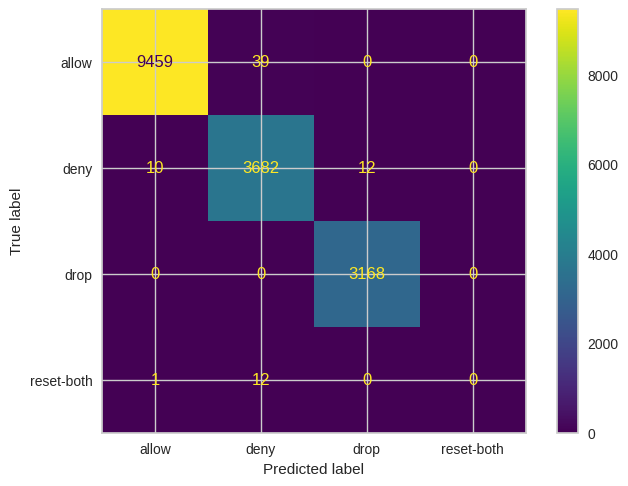

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,p)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=0.005).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
p=rbf.predict(X_test)
print(classification_report(y_test,p))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,p)